In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def gradient_descent(f, df, x0, step_size_fn, max_iter):
    """
    Performs gradient descent on the given function f, with its gradient df.

    :param f: A function whose input is an x, a column vector, and returns a scalar.
    :param df: A function whose input is an x, a column vector, and returns a column vector representing the gradient of f at x.
    :param x0: An initial value of x, x0, which is a column vector.
    :param step_size: The step size to use in each step
    :param max_iter: The number of iterations to perform

    :return x: the value at the final step
    :return fs: the list of values of f found during all the iterations (including f(x0))
    :return xs: the list of values of x found during all the iterations (including x0)
    """

    # Exercise 1 (d): Todo: Implement here.
    x = x0
    fs = [f(x0)]
    xs = [x0]
    step = 0
    for _ in range(max_iter):
        step += 1
        x = x - (step_size_fn(step) * df(x))
        fs.append(f(x))
        xs.append(x)
    return x, fs, xs

In [11]:
def transform_polynomial_basis_1d(x, order):
    """
    Transforms a single 1-dimensional data point x with a polynomial basis transformation.

    :param x: A numpy array with a single value (d=1).
    :param order: Can be 0, 1, 2 or 3.
    :return: The transformed data point x as a list.
    """
    # if order not in range (4):
    #     raise ValueError("Illegal order value")
    # else:
    return [x ** power for power in range (order + 1)]

In [12]:
def data_linear_trivial():
    X = np.array([[-6], [-4], [-2], [0], [2], [4], [6]])
    Y = np.array([[-6], [-4], [-2], [0], [2], [4], [6]])
    return X, Y


def data_linear_simple():
    X = np.array([[-6], [-4], [-2], [0], [2], [4], [6]])
    Y = np.array([[-5], [-5], [-3], [1], [2], [5], [6]])
    return X, Y


def data_linear_offset():
    X = np.array([[-6], [-4], [-2], [0], [2], [4], [6]])
    Y = np.array([[-6], [-4], [-2], [0], [2], [4], [6]]) + 6
    return X, Y


def data_quadratic():
    X = np.array([[-6], [-4], [-2], [0], [2], [4], [6]])
    Y = np.array([[12], [3], [1], [0], [1], [3], [12]])
    return X, Y


def data_polynomial():
    X = np.array([[-6], [-4], [-2], [0], [2], [4], [6], [8]])
    Y = np.array([[12], [3], [1], [0], [1], [3], [12], [3]])
    return X, Y
def data_mock_test():
    X = np.array([[0], [1], [2], [3]])
    Y = np.array([[1], [2], [2], [2]])
    return X, Y

-1.333333337344161


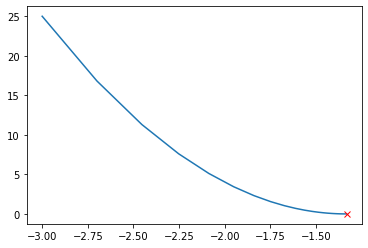

In [150]:
def plot_line_2d(axes, theta, line_style, xmin=-10, xmax=10):
    """
    Takes a 2-dimensional theta and plots the line defined by (theta[1], theta[0]) into the given axes.
    """
    p1_y = theta[0] * xmin + theta[1]
    p2_y = theta[0] * xmax + theta[1]
    ax.plot([xmin, xmax], [p1_y.flatten(), p2_y.flatten()], line_style)

def f1(x):
    # Our function is f(x) = (3x+4)^2
    return float((3 * x + 4) ** 2)

def df1(x):
    # 1 (c): Todo: Implement the derivative here
    return float(18 * x + 24)

# 1 (e): Todo: Plot the function:
fig_simple, ax_simple = plt.subplots()  # create an empty plot and retrieve the 'ax' handle
# ...

# Todo: Set and plot the initial value:
x0 = -3
# ...

# Run gradient descent to find the minimum of the function:
# Todo: Experiment with step size, max_iter
last_x, fs, xs = gradient_descent(f1, df1, x0, step_size_fn=lambda i: 0.01, max_iter=100)
# Todo: Plot the found 'x' value and f(x)
ax_simple.plot(xs, fs)
ax_simple.plot(last_x, f1(last_x), color = 'red', marker = 'x')
print(last_x)
# Todo: Plot each step of gradient descent, to see how it converges/diverges
# ...


array([[1.3],
       [0.3]])

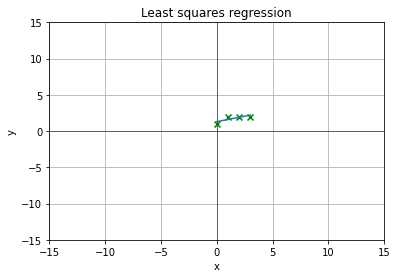

In [7]:
# Exercise 2: Least Squares Regression
# -----------
# Get some example data (browse the file to see the various data_* functions provided):
X, Y = data_mock_test()

# Create a plot and set up some default plot options:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.grid(True, which='both')
ax.axhline(color='black', linewidth=0.5)
ax.axvline(color='black', linewidth=0.5)
ax.set_title("Least squares regression")
# Todo: Plot the data here (ex. 2.2)
# ...
ax.scatter(X, Y, color = 'green', marker = 'x')
# Todo: Feature transformation, add column of ones
X_augmented = np.array([transform_polynomial_basis_1d(x[0], 1) for x in X])
# Exercise 2.2: Todo: Compute theta* using the analytical OLS solution:
# ------------
theta_star = np.dot(np.dot(np.linalg.inv(np.dot(X_augmented.T, X_augmented)), X_augmented.T), Y)

ax.plot(X, [np.dot(x, theta_star) for x in X_augmented])
# Todo: Plot the resulting hypothesis into the plot:
# plot_line_2d(...)
#plot_line_2d(ax, theta_star, '-.')
theta_star

array([[0.39078512],
       [0.55665795]])

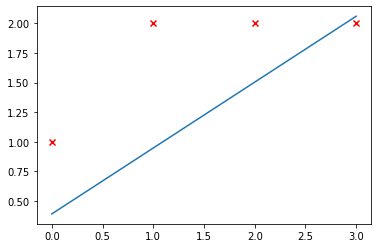

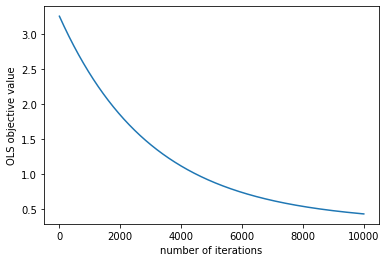

In [13]:
# Exercise 2.3 - Solution using gradient descent:
# ------------

# Todo: Implement the loss function:
reg_rate = 0
def squared_loss(x, y, theta):
    return (np.dot(x.T, theta) - y) ** 2

# Todo: Implement the OLS objective function (using the loss):
def ols_objective(X, Y, theta):
    return np.mean([squared_loss(x, y, theta) for x, y in zip(X, Y)])

# Todo: Implement the partial derivative of the squared loss w.r.t. theta
def d_squared_loss_theta(X, Y, theta):
    return (2 / X.shape[0]) * ((X.T @ X @ theta) - (X.T @ Y))

    # Todo: Implement the partial derivative of the OLS objective w.r.t. theta (using the partial derivative of the squared loss):
def d_ols_objective_theta(X, Y, theta):
    return d_squared_loss_theta(X, Y, theta)

    # Finally, the gradient of our OLS objective is simply d_ols_objective_theta (as theta is our only parameter):
def ols_objective_grad(X, Y, theta):
    return d_ols_objective_theta(X, Y, theta)

    # And we define the function that we want to minimise as the OLS objective over our dataset (X_augmented, Y):
def f_ols(theta):
    return (ols_objective(X_augmented, Y, theta) + (reg_rate * np.linalg.norm(theta)))

    # And its gradient:
def df_ols(theta):
    return (ols_objective_grad(X_augmented, Y, theta) + (2 * reg_rate * theta))

    # Todo: Set an initial value for theta_init:
theta_init = np.zeros((X_augmented.shape[1],1))

    # We define a step size function - let's return a constant step size, independent of the iteration i:
def step_size_fn(i):
    return 0.00002   # Todo: Experiment with various step sizes
    # Now we're ready to run gradient descent to minimise f_ols:
last_x, fs, xs = gradient_descent(f_ols, df_ols, theta_init, step_size_fn=step_size_fn, max_iter=10000)

# Todo: Plot the found hypothesis into the figure with the data.
plt.scatter(X, Y, color = 'red', marker = 'x')
plt.plot(X, [np.dot(x, last_x) for x in X_augmented])
plt.savefig("reg.png")
# Todo: Also plot individual steps of gradient descent, to see how the optimisation behaves.
# plot_line_2d(...)
# ...

# Exercise 2.3 iii):
fig_loss, ax_loss = plt.subplots()  # Create an empty figure for the loss plot
ax_loss.set_xlabel('number of iterations')
ax_loss.set_ylabel('OLS objective value')
# Todo: Plot the loss over the iterations
# ... ax_loss.plot(...) ...
plt.plot(range(len(xs)), fs)

# Optional: Exercise 2.4
# Ex. 2.4 (b) iii): Plot the polynomial separator in 2D:
# ...
np.set_printoptions(suppress=True)
last_x

In [16]:
d_ols_objective_theta(np.array([[1, 2,-1]]), [1], [1, 1,1])

array([ 2.,  4., -2.])

KeyboardInterrupt: 

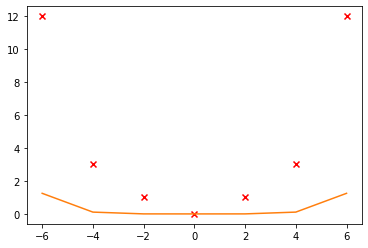

In [92]:
import imageio
images = []
plt.scatter(X, Y, color = 'red', marker = 'x')
for theta in xs[0::20]:
    line = plt.plot(X, [np.dot(x, theta) for x in X_augmented])
    plt.savefig("out.png")
    line.pop(0).remove()
    images.append(imageio.imread("out.png"))

In [ ]:
imageio.mimsave("gradient_descent.gif", images)

In [ ]:
X = np.array([[1,1]])
Y = np.array([-2])
theta = np.array([3, -3])
2*(X.T @ X @ theta) - (X.T @ Y)

array([2, 2])